# Course Description
This course extends Intermediate Python for Data Science to provide a stronger foundation in data visualization in Python. The course provides a broader coverage of the Matplotlib library and an overview of Seaborn (a package for statistical graphics). Topics covered include customizing graphics, plotting two-dimensional arrays (e.g., pseudocolor plots, contour plots, images, etc.), statistical graphics (e.g., visualizing distributions & regressions), and working with time series and image data.

## 1. Customizing Plots
Following a review of basic plotting with Matplotlib, this chapter delves into customizing plots using Matplotlib. This includes overlaying plots, making subplots, controlling axes, adding legends and annotations, and using different plot styles.

In [157]:
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import findspark
import pyspark
import random
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [158]:
spark = SparkSession.builder.getOrCreate()
# Load data, note inferSchema=True, means all column types are inferred (so don't all turn to strings)
auto = spark.read.csv("data/auto-mpg.csv", header=True, inferSchema =True)
stocks = spark.read.csv("data/stocks.csv", header=True, inferSchema =True)
woman = spark.read.csv("data/percent-bachelors-degrees-women-usa.csv", header=True, inferSchema =True)


PLOT MULTIPLE SERIES ON SAME PLOT


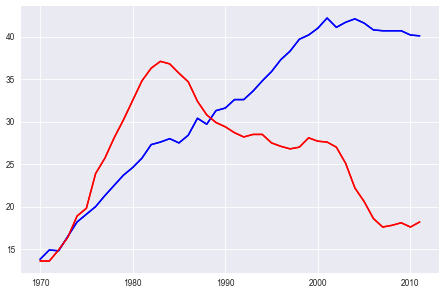

PLOT 4 DIFFERENT SERIES ON DIFFERENT AXIS USING SUBPLOT


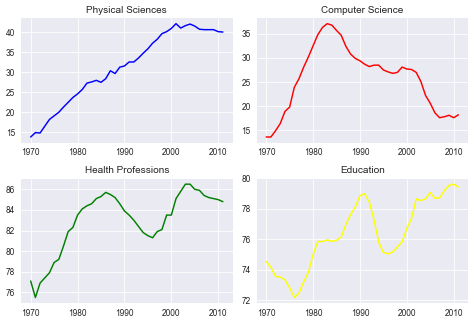

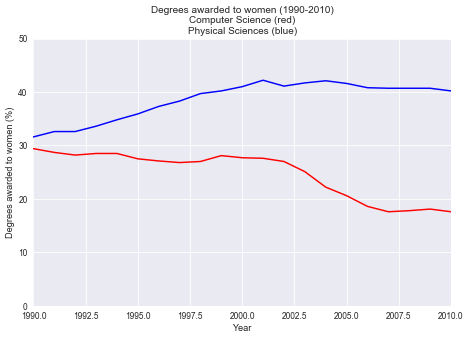

In [159]:
# Size of plt plots
plt.rcParams['figure.dpi'] = 60
#Cast values from strings to numeric
# woman = woman.withColumn("Physical Sciences", woman["Physical Sciences"].cast("float"))
woman_pd = woman.toPandas()
#Create panda series
year = woman_pd['Year']
physical_sciences = woman_pd['Physical Sciences']
computer_science = woman_pd['Computer Science']
health = woman_pd['Health Professions']
education = woman_pd['Education']


print("PLOT MULTIPLE SERIES ON SAME PLOT")
#Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(woman_pd['Year'], woman_pd['Physical Sciences'], color='blue')
# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(woman_pd['Year'], woman_pd['Computer Science'], color='red')
plt.plot(year, physical_sciences, color='blue')
plt.plot(year, computer_science, color='red')
# Display the plot
plt.show()
plt.clf


print("PLOT 4 DIFFERENT SERIES ON DIFFERENT AXIS USING SUBPLOT")
# Create a figure with 2x2 subplot layout and make the top left subplot active
plt.subplot(2,2,1)
# Plot in blue the % of degrees awarded to women in the Physical Sciences
plt.plot(year, physical_sciences, color='blue')
plt.title('Physical Sciences')
# Make the top right subplot active in the current 2x2 subplot grid 
plt.subplot(2,2,2)
# Plot in red the % of degrees awarded to women in Computer Science
plt.plot(year, computer_science, color='red')
plt.title('Computer Science')
# Make the bottom left subplot active in the current 2x2 subplot grid
plt.subplot(2,2,3)
# Plot in green the % of degrees awarded to women in Health Professions
plt.plot(year, health, color='green')
plt.title('Health Professions')
# Make the bottom right subplot active in the current 2x2 subplot grid
plt.subplot(2,2,4)
# Plot in yellow the % of degrees awarded to women in Education
plt.plot(year, education, color='yellow')
plt.title('Education')
# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()


plt.plot(year,computer_science, color='red') 
plt.plot(year, physical_sciences, color='blue')
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')
# Set the x-axis range
plt.xlim(1990,2010)
# Set the y-axis range
plt.ylim(0,50)
# Or could do
plt.axis((1990,2010,0,50))
plt.title('Degrees awarded to women (1990-2010)\nComputer Science (red)\nPhysical Sciences (blue)')
plt.show()
# Save the image as 'xlim_and_ylim.png'
# plt.savefig('xlim_and_ylim.png')


## Labels and Legends

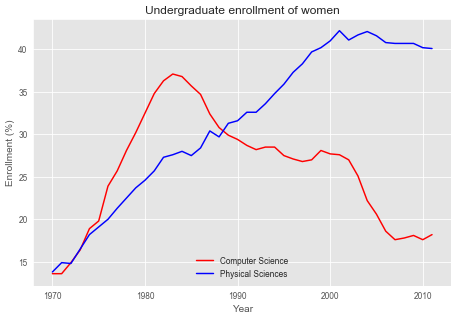

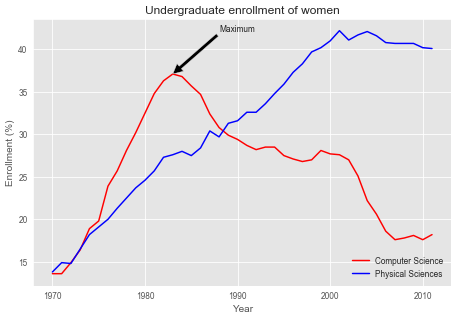

In [160]:
# Change style to ggplot
plt.style.use('ggplot')
# plt.style.use(['dark_background'])

# Specify the label 'Computer Science'
plt.plot(year, computer_science, color='red', label='Computer Science') 
# Specify the label 'Physical Sciences' 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')
# Add a legend at the lower center
plt.legend(loc='lower center')
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()

# Plot with legend as before
plt.plot(year, computer_science, color='red', label='Computer Science') 
plt.plot(year, physical_sciences, color='blue', label='Physical Sciences')
plt.legend(loc='lower right')
# Compute the maximum enrollment of women in Computer Science: cs_max
cs_max = computer_science.max()
# Calculate the year in which there was maximum enrollment of women in Computer Science: yr_max
yr_max = year[computer_science.argmax()]
# Add a black arrow annotation
plt.annotate('Maximum',arrowprops=dict(facecolor='black'), xy=(yr_max,cs_max), xytext=(yr_max+5, cs_max+5))
# Add axis labels and title
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()



# Plotting 2D arrays
This chapter showcases various techniques for visualizing two-dimensional arrays. This includes the use, presentation, and orientation of grids for representing two-variable functions followed by discussions of pseudocolor plots, contour plots, color maps, two-dimensional histograms, and images.

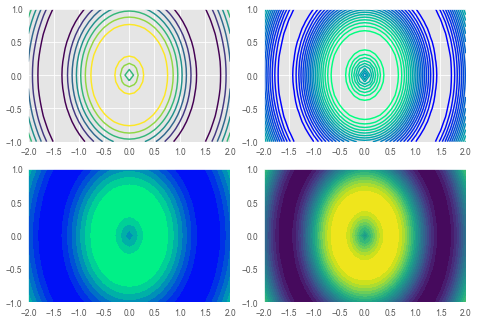

CONTOUR PLOTS WITH DIFFERENT COLORS AND COLORBAR


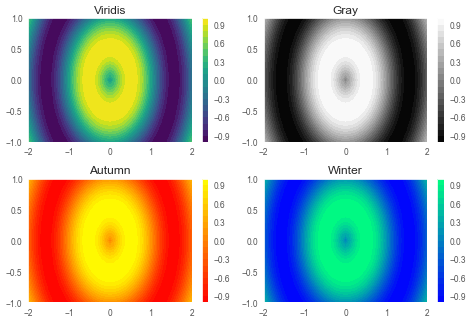

In [163]:
# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 41)
v = np.linspace(-1,1,21)
# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u,v)
# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2))

# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X,Y,Z,cmap='viridis')
# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contour(X,Y,Z,20, cmap='winter')
# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contourf(X,Y,Z, cmap='winter')
# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20, cmap='viridis')
# Improve the spacing between subplots
plt.tight_layout()
# Display the figure
plt.show()

print('CONTOUR PLOTS WITH DIFFERENT COLORS AND COLORBAR')

# Create a filled contour plot with a color map of 'viridis'
plt.subplot(2,2,1)
plt.contourf(X,Y,Z,20, cmap='viridis')
plt.colorbar()
plt.title('Viridis')
# Create a filled contour plot with a color map of 'gray'
plt.subplot(2,2,2)
plt.contourf(X,Y,Z,20, cmap='gray')
plt.colorbar()
plt.title('Gray')
# Create a filled contour plot with a color map of 'autumn'
plt.subplot(2,2,3)
plt.contourf(X,Y,Z,20, cmap="autumn")
plt.colorbar()
plt.title('Autumn')
# Create a filled contour plot with a color map of 'winter'
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20, cmap='winter')
plt.colorbar()
plt.title('Winter')
# Improve the spacing between subplots and display them
plt.tight_layout()
plt.show()

## 2D histogram plots

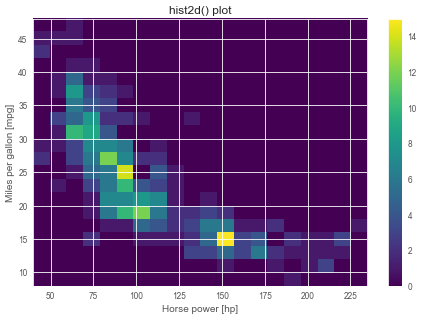

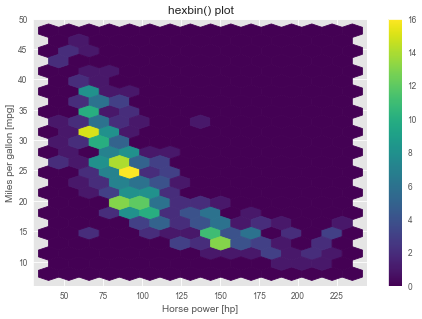

In [167]:
auto_pd = auto.toPandas()
hp = auto_pd['hp']
mpg = auto_pd['mpg']
# Generate a 2-D histogram
plt.hist2d(hp, mpg, bins=(20,20), cmap='viridis', range=((40,235),(8,48)))
# Add a color bar to the histogram
plt.colorbar()
# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show()


# Generate a 2d histogram with hexagonal bins
plt.hexbin(hp, mpg, gridsize=(15,12), extent=(40,235,8,48), cmap='viridis')
# Add a color bar to the histogram
plt.colorbar()
# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hexbin() plot')
plt.show()

# Statistical Plots with Seaborn
This is a high-level tour of the Seaborn plotting library for producing statistical graphics in Python. The tour covers Seaborn tools for computing and visualizing linear regressions as well as tools for visualizing univariate distributions (e.g., strip, swarm, and violin plots) and multivariate distributions (e.g., joint plots, pair plots, and heatmaps). This also includes a discussion of grouping categories in plots.

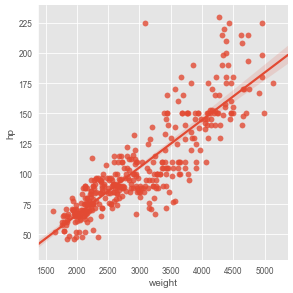

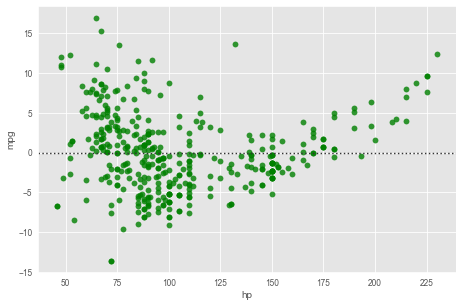

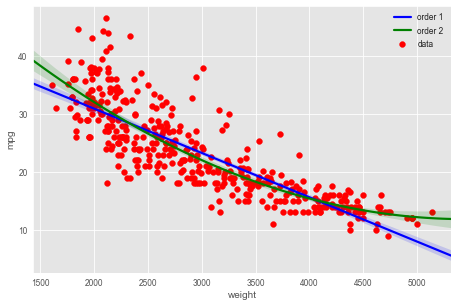

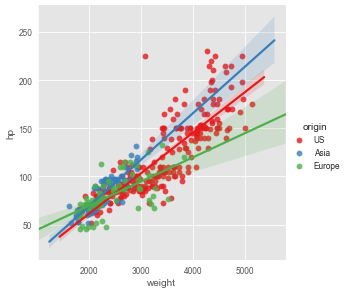

In [168]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

auto_pd = auto.toPandas()
# Plot a linear regression between 'weight' and 'hp'
sns.lmplot(x='weight', y='hp', data=auto_pd)

# Display the plot
plt.show()

# Generate a green residual plot of the regression between 'hp' and 'mpg'
sns.residplot(x='hp', y='mpg', data=auto_pd, color='green')
# Display the plot
plt.show()

# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto_pd['weight'], auto_pd['mpg'], label='data', color='red', marker='o')
# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto_pd, scatter=None, color='blue', label='order 1')
# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto_pd, scatter=None, order=2, color='green', label='order 2')
# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()


# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'. Note hue allows 
# you to group by a categorical variable in this case origin
sns.lmplot(x='weight', y='hp', data=auto_pd, hue='origin', palette='Set1')
# Display the plot
plt.show()


# # Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
# sns.lmplot(x='weight',y='hp', data=auto_pd, row='origin')
# plt.title("row= grouped by origin by row")
# # Display the plot
# plt.show()

## Plotting Distributions with Seaborn

BASIC DISTRIBUTION PLOTS


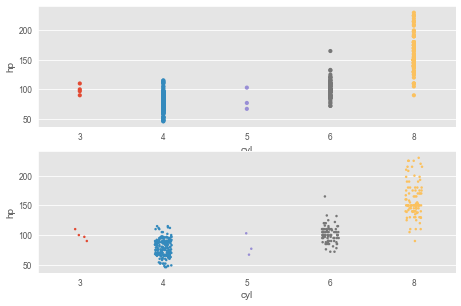

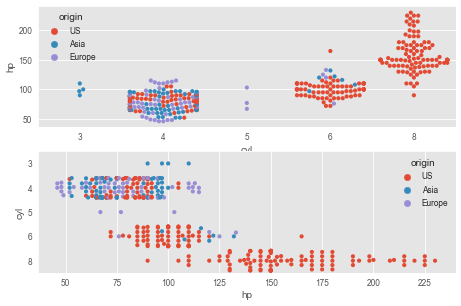

In [169]:
print('BASIC DISTRIBUTION PLOTS')
# Make a strip plot of 'hp' grouped by 'cyl'
plt.subplot(2,1,1)
sns.stripplot(x='cyl', y='hp', data=auto_pd, jitter=False)
# Make the strip plot again using jitter and a smaller point size
plt.subplot(2,1,2)
sns.stripplot(x='cyl', y='hp', size=3, jitter=True, data=auto_pd)
# Display the plot
plt.show()


# Generate a swarm plot of 'hp' grouped horizontally by 'cyl'  
plt.subplot(2,1,1)
sns.swarmplot(x='cyl', y='hp', data=auto_pd, orient='v', hue='origin')
# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
plt.subplot(2,1,2)
sns.swarmplot(x='hp', y='cyl', data=auto_pd, orient='h', hue='origin')
# Display the plot
plt.show()



## Violin plots
These are very good when data is large and becomes over crowded

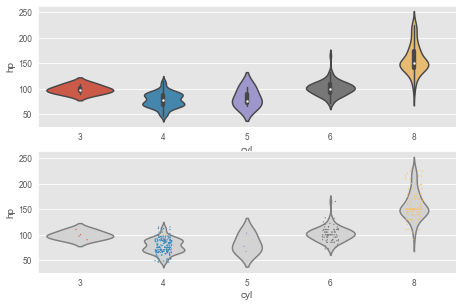

In [170]:
# Generate a violin plot of 'hp' grouped horizontally by 'cyl'
plt.subplot(2,1,1)
sns.violinplot(x='cyl', y='hp', data=auto_pd)

# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
plt.subplot(2,1,2)
sns.violinplot(x='cyl', y='hp', data=auto_pd, inner=None, color='lightgray')
# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl',y='hp', data=auto_pd, jitter=True, size=1.5)
# Display the plot
plt.show()

## Visualizing Multivariate Distributions

Joint plots to show how pairs of continuous random variables vary jointly through bivariate distribution
['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


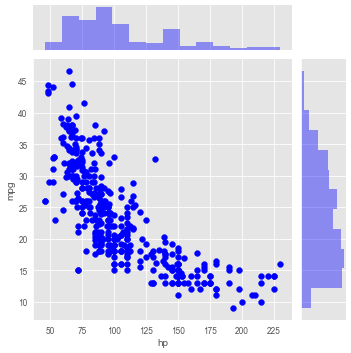

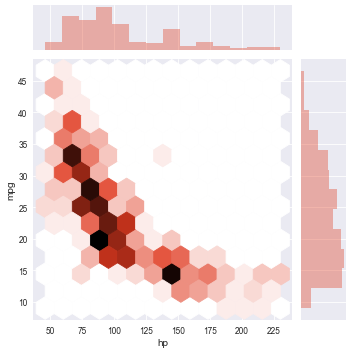

In [171]:
print("Joint plots to show how pairs of continuous random variables vary jointly through bivariate distribution")
# Generate a joint plot of 'hp' and 'mpg'
sns.jointplot(x='hp', y='mpg', data=auto_pd, color='blue')
# Display the plot
plt.style.use('seaborn-darkgrid')
print(plt.style.available)
plt.show()

# Generate a joint plot of 'hp' and 'mpg' using a hexbin plot
sns.jointplot(x='hp',y='mpg', data=auto_pd,kind='hex')
# Display the plot
plt.show()


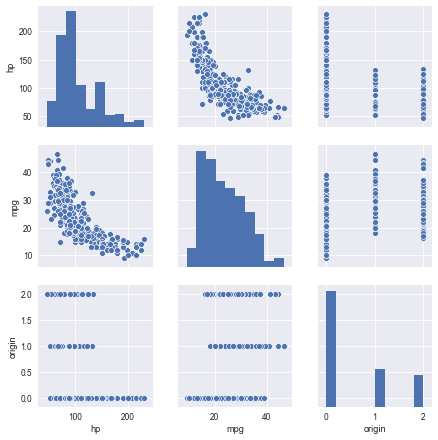

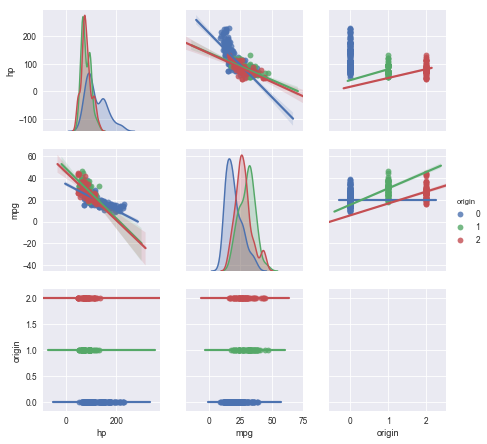

In [156]:
auto_s = auto_pd[['hp', 'mpg', 'origin']].copy()
sns.pairplot(auto_s)
plt.show()

# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto_s, kind='reg', hue='origin')
# Display the plot
plt.show()

## Visualizing correlations with a heatmap

Plotting relationships between many variables using a pair plot can quickly get visually overwhelming. It is therefore often useful to compute covariances between the variables instead. The covariance matrix can then easily be visualized as a heatmap. A heatmap is effectively a pseudocolor plot with labelled rows and columns (i.e., a pseudocolor plot based on a pandas DataFrame rather than a matrix). The DataFrame does not have to be square or symmetric (but, in the context of a covariance matrix, it is both).

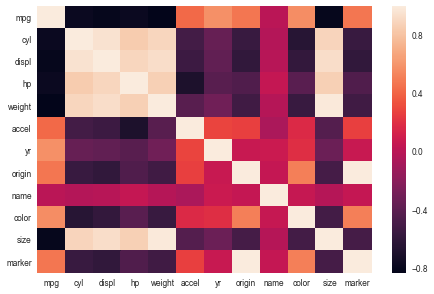

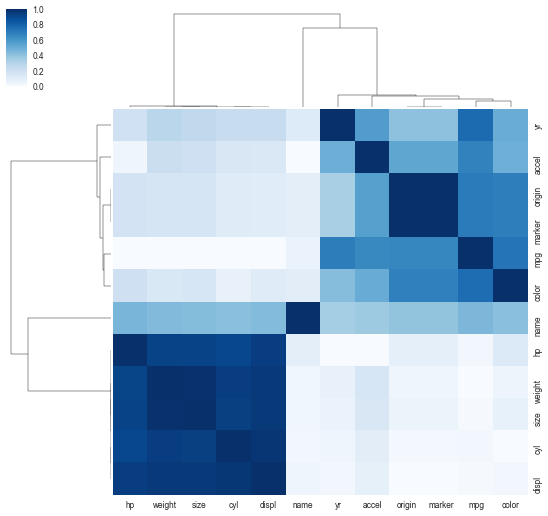

In [153]:
plt.rcParams['figure.dpi'] = 60
df = auto_pd
df['color']=pd.factorize(df['color'])[0]#df.columns.astype('category').cat.codes
df['name']=pd.factorize(df['name'])[0]#df.columns.astype('category').cat.codes
df['origin']=pd.factorize(df['origin'])[0]#df.columns.astype('category').cat.codes
df['marker']=pd.factorize(df['marker'])[0]#df.columns.astype('category').cat.codes
auto_cor_matrix = df.corr()

# Visualize the covariance matrix using a heatmap
sns.heatmap(auto_cor_matrix)
# Display the heatmap
plt.show()

sns.clustermap(auto_cor_matrix, metric="correlation", method="single", cmap="Blues", standard_scale=1)


# Analysing Time Series and Images
This chapter ties together the skills gained so far through examining time series data and images. This involves customizing plots of stock data, generating histograms of image pixel intensities, and enhancing image contrast through histogram equalization.

Date    datetime64[ns]
AAPL           float64
IBM            float64
CSCO           float64
MSFT           float64
dtype: object


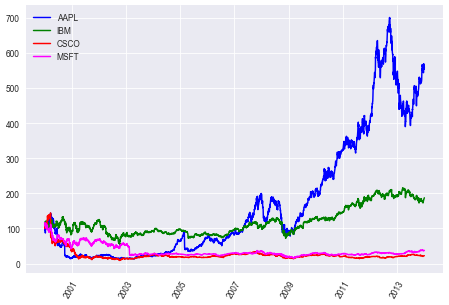

SLICING DATA


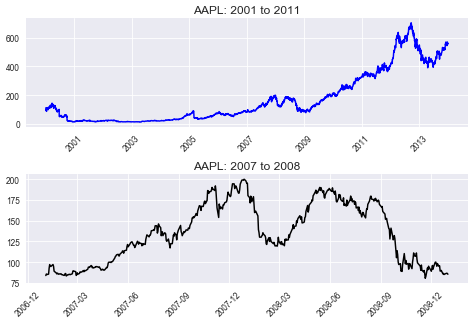

SLICING DATA AND GROUPING GRAPHS


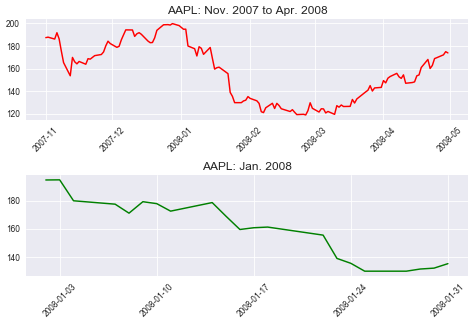

GRAPHS WITHIN GRAPHS


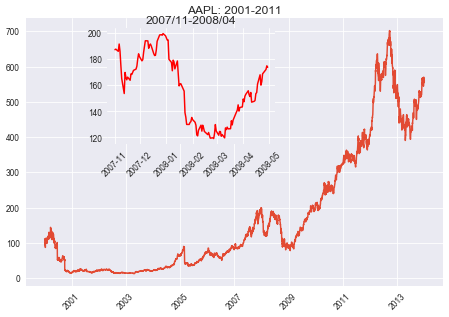

In [172]:
# Converting to Series object can take some time
s = stocks.toPandas()
print(s.dtypes)
d = s['Date']
A = np.array(s['AAPL'])
I = np.array(s['IBM'])
C = np.array(s['CSCO'])
M = np.array(s['MSFT'])
aapl = pd.Series(data=A, index=d)
ibm = pd.Series(data=I, index=d)
csco = pd.Series(data=C, index=d)
msft = pd.Series(data=M, index=d)

# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')
# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')
# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')
# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')
# Specify the orientation of the xticks
plt.xticks(rotation=60)
# Display the plot
plt.show()


print('SLICING DATA')
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')
# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']
# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()

print('SLICING DATA AND GROUPING GRAPHS')
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']
# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.plot(view,color='red')
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.xticks(rotation=45)
# Reassign the series by slicing the month January 2008
view = aapl['2008-01']
# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.plot(view,color='green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation=45)
# Improve spacing and display the plot
plt.tight_layout()
plt.show()


print('GRAPHS WITHIN GRAPHS')
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = aapl['2007-11':'2008-04']
# Plot the entire series 
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')
# Specify the axes
plt.axes([0.25,0.5,0.35,0.35])
# Plot the sliced series in red using the current axes
plt.plot(view,color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()

## Plot Moving Averages time series

['seaborn-dark', 'seaborn-darkgrid', 'seaborn-ticks', 'fivethirtyeight', 'seaborn-whitegrid', 'classic', '_classic_test', 'fast', 'seaborn-talk', 'seaborn-dark-palette', 'seaborn-bright', 'seaborn-pastel', 'grayscale', 'seaborn-notebook', 'ggplot', 'seaborn-colorblind', 'seaborn-muted', 'seaborn', 'Solarize_Light2', 'seaborn-paper', 'bmh', 'tableau-colorblind10', 'seaborn-white', 'dark_background', 'seaborn-poster', 'seaborn-deep']


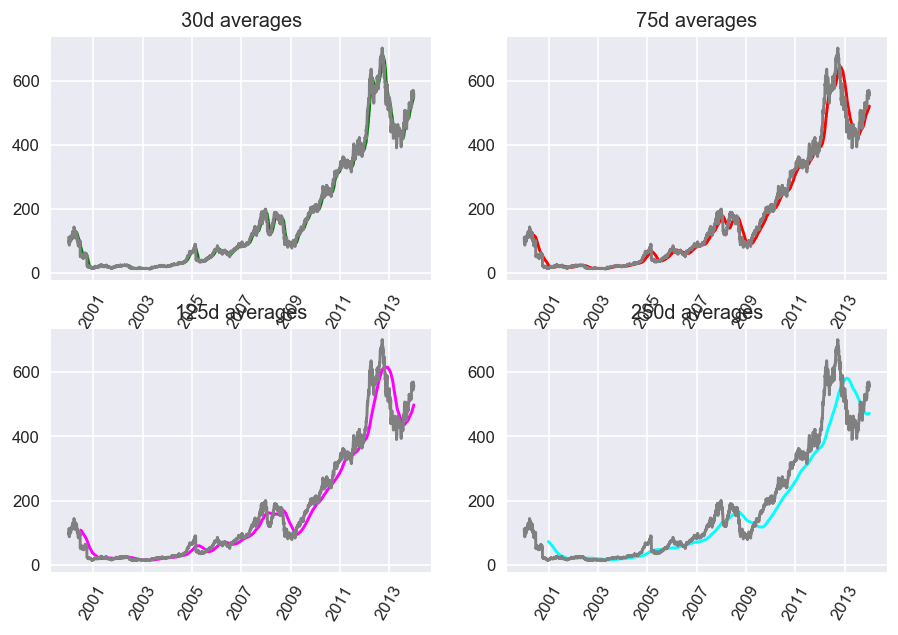

In [173]:
print(plt.style.available)
plt.style.use('seaborn')

plt.rcParams['figure.dpi'] = 120
# Tail-rolling average transform
t = aapl.rolling(window=30)
t1 = aapl.rolling(window=75)
t2 = aapl.rolling(window=125)
t3 = aapl.rolling(window=250)
mean_30 = t.mean()
mean_75 = t1.mean()
mean_125 = t2.mean()
mean_250 = t3.mean()

# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, color='green')
plt.plot(aapl, color='gray')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, 'red')
plt.plot(aapl, color='gray')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125,color='magenta')
plt.plot(aapl, color='gray')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2,2,4)
plt.plot(mean_250, color='cyan')
plt.plot(aapl, color='gray')
plt.xticks(rotation=60)
plt.title('250d averages')

# Display the plot
plt.show()

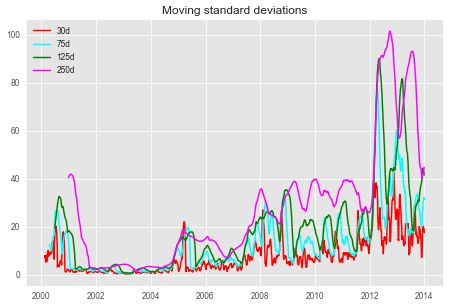

In [150]:
std_30 = t.std()
std_75 = t1.std()
std_125 = t2.std()
std_250 = t3.std()

# Plot std_30 in red
plt.plot(std_30, color='red', label='30d')
# Plot std_75 in cyan
plt.plot(std_75, color='cyan', label='75d')
# Plot std_125 in green
plt.plot(std_125, color='green', label='125d')
# Plot std_250 in magenta
plt.plot(std_250, color='magenta', label='250d')
# Add a legend to the upper left
plt.legend(loc='upper left')
# Add a title
plt.title('Moving standard deviations')
# Display the plot
plt.show()

# Image Histograms and pixel enhacement

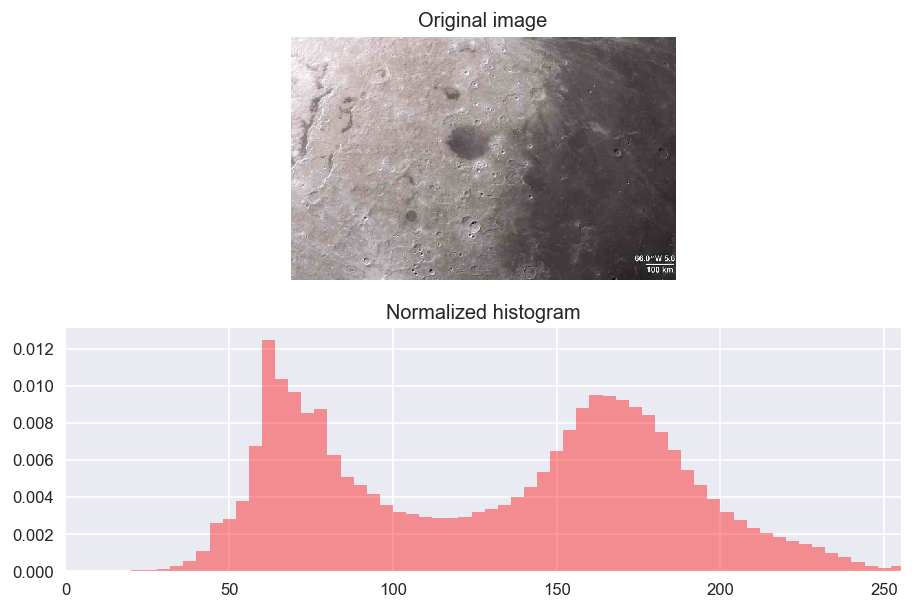

In [136]:
# Load the image into an array: image
image = plt.imread('data/moon.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels, bins=64, color='red', alpha=0.4, range=(0,256), normed=True)

# Display the plot
plt.show()

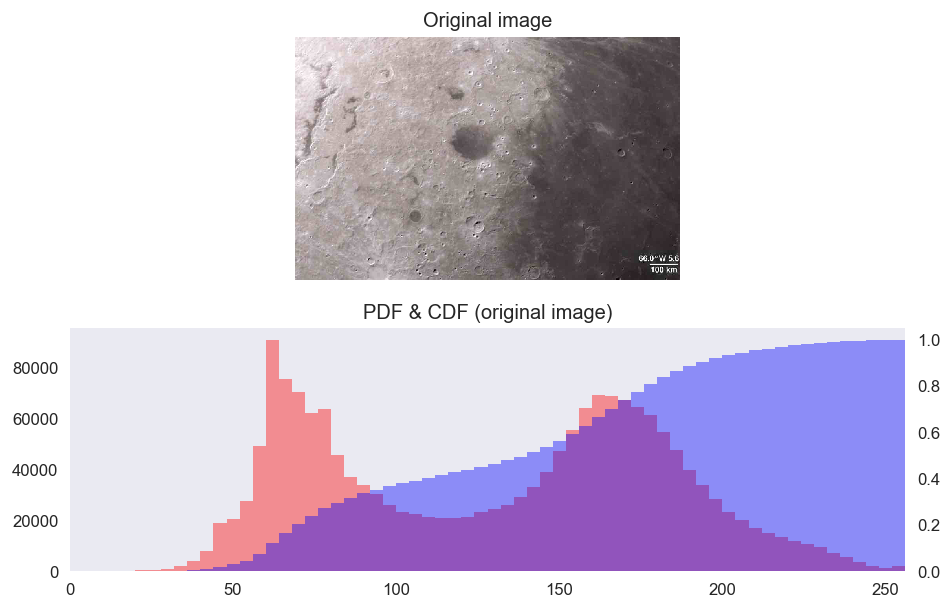

In [138]:
# Load the image into an array: image
image = plt.imread('data/moon.jpg')

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.imshow(image, cmap='gray')
plt.title('Original image')
plt.axis('off')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               normed=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid('off')
plt.title('PDF & CDF (original image)')
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


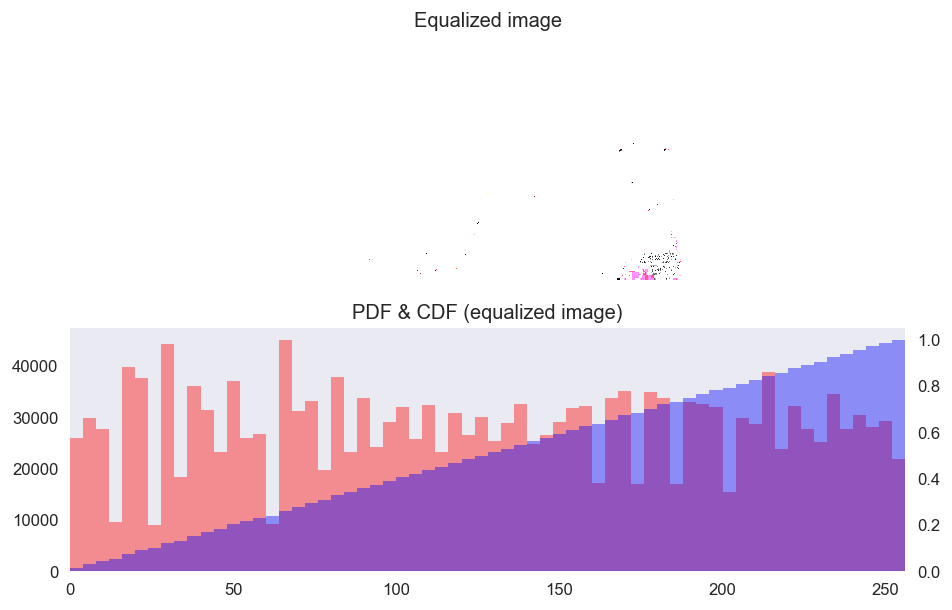

In [141]:
# Load the image into an array: image
image = plt.imread('data/moon.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
               color='red', alpha=0.4)
plt.grid('off')

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid('off')

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, normed=True,
               color='blue', alpha=0.4)
plt.show()